In [17]:
# FaceNet + KNN dataset handled.

In [18]:
!pip install tensorflow

In [19]:
!pip install deepface

In [20]:
!pip install tf-keras

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from deepface import DeepFace
import os
from tqdm import tqdm
from PIL import Image

# Load and preprocess the images
def load_and_preprocess_images(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        for filename in os.listdir(label_folder):
            img_path = os.path.join(label_folder, filename)
            
            # Open image, convert to grayscale, resize, and normalize
            # img = Image.open(img_path).convert('L')  # Convert to grayscale
            img = Image.open(img_path)
            img = img.resize((112, 92))  # Resize to desired input shape
            # img_array = np.array(img) / 255.0  # Normalize to [0, 1]
            img_array = np.array(img)
            
            images.append(img_array)
            labels.append(label)
    return np.array(images), labels

# Generate face embeddings
def generate_embeddings(images):
    embeddings = []
    for img_array in tqdm(images):
        try:
            # Save the preprocessed image to a temporary file
            temp_img_path = 'temp_img.jpg'
            Image.fromarray((img_array * 255).astype(np.uint8)).save(temp_img_path)
            
            # Extract embeddings using DeepFace
            embedding = DeepFace.represent(img_path=temp_img_path, model_name="Facenet", enforce_detection=False)
            embeddings.append(embedding[0]['embedding'])
        except Exception as e:
            print(f"Error processing image: {e}")
            embeddings.append(np.zeros(128))  # Assuming the embedding dimension is 128
    
    return np.array(embeddings)

# Load and preprocess dataset
folder_path = "./dataset"  # Update with your dataset path
images, labels = load_and_preprocess_images(folder_path)

# Generate embeddings
embeddings = generate_embeddings(images)

from sklearn.model_selection import train_test_split
import numpy as np

100%|██████████| 400/400 [02:30<00:00,  2.67it/s]


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Function to flatten image data
def flatten_images(images):
    return np.array([img.flatten() for img in images])

# Assuming 'images' is a list/array of images and 'labels' is the corresponding labels
# Flatten image data
images_flattened = flatten_images(images)

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(images_flattened, labels, test_size=0.4, random_state=42, stratify=labels)

# Verify the proportions
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Train a classifier (e.g., K-Nearest Neighbors)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Test the model
y_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")


Training set size: 240 samples
Test set size: 160 samples
Test Accuracy: 0.82
Test Precision: 0.88
Test Recall: 0.82
Test F1 Score: 0.81


In [23]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


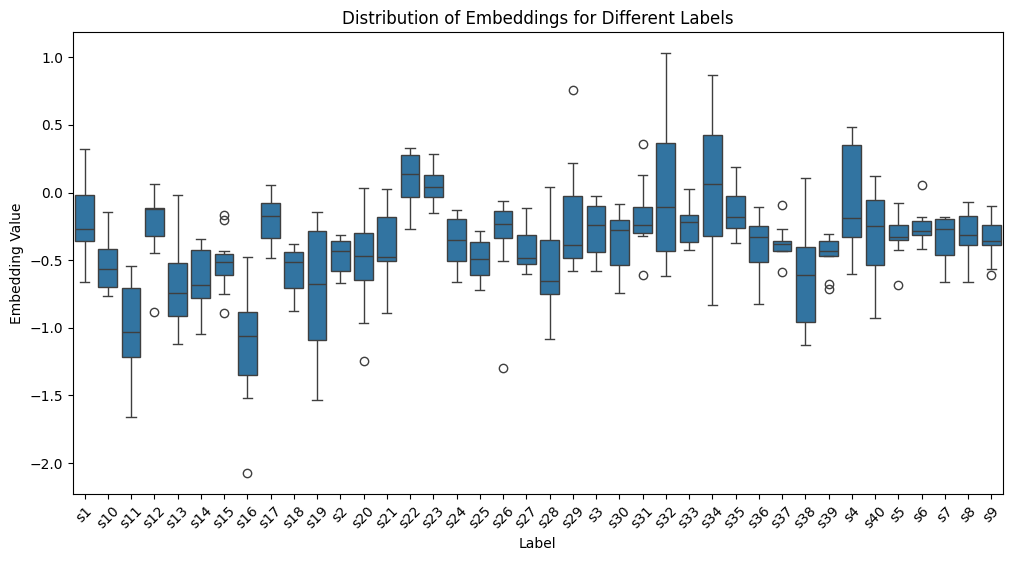

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming embeddings and labels are available

def plot_embedding_distribution(embeddings, labels):
    df = pd.DataFrame(embeddings)
    df['label'] = labels
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='label', y=0, data=df)
    plt.title('Distribution of Embeddings for Different Labels')
    plt.xlabel('Label')
    plt.ylabel('Embedding Value')
    plt.xticks(rotation=45)
    plt.show()

plot_embedding_distribution(embeddings, labels)